<a href="https://colab.research.google.com/github/nandiniparekh/Image-Classification-using-CNN/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Recognition using CNN

I explore image classification using Convulutional Neural Networks. The model trains and tests on MNIST Digits, parameterizes a basic CNN (a simplified LeNet Architecture) using a 5-fold stratified cross-validation design.

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

np.random.seed(0)

# Data Preprocessing

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


## Visualize The Data

A visual of the data from the dataset is shown below.

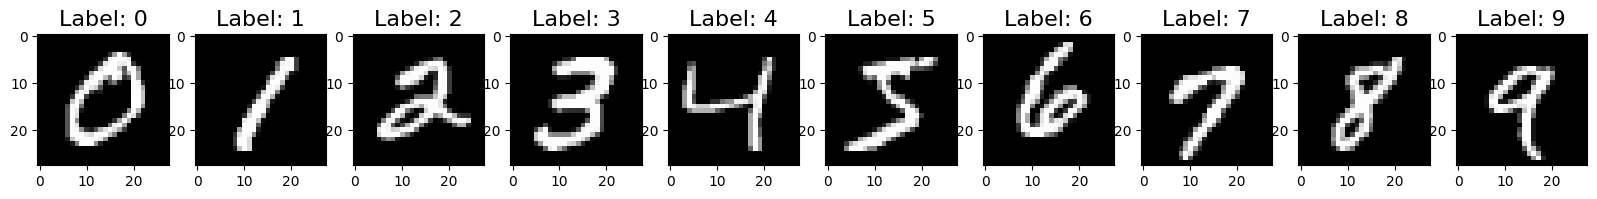

In [ ]:
num_classes= 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=16)

# Convolutional Neural Network Model

The CNN model, specifically, the LeNet architecture using some modern design choices. The updates are:
Use a ReLU activation instead of a sigmoid one.

*   ReLU activation is used instead of a sigmoid one
*   The pooling layers use the MAX() function instead of the arithmetic mean
*  The classification uses a single dense layer followed by a softmax layer




In [ ]:
def create_model(filter=16, learning_rate=0.001):
  model = Sequential()

  # C1 Convolutional layer
  model.add(Conv2D(filter, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

  # S2 SubSampling (Pooling) layer
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # C3 Convolutional layer
  model.add(Conv2D(filter, kernel_size=(3, 3), activation='relu'))

  # S4 SubSampling (Pooling) layer
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # C5 Fully connected layer
  model.add(Dense(120, activation='relu'))

  # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
  model.add(Flatten())

  # Classification

  # FC6 Fully Connected Layers
  model.add(Dense(84, activation='relu'))

  # Output Layer
  model.add(Dense(10, activation="softmax"))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
  return model



## Parameter Exploration

The following paramters are explored by the model:
*   Number of Filters=[16, 32]
*   Learning rate = [0.001, 0.01]

A 5-fold stratified cross-fold validation is applied here.




In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

print("Training the model\n")

# Hyperparamters
best_f1 = 0
best_accuracy = 0
best_params = None
filter_grid = [16, 32]
lr_grid = [0.001, 0.01]

skf = StratifiedKFold(n_splits=5)

for filter in filter_grid:
  for lr in lr_grid:
    accuracy_scores = []

    # Stratified Cross Validation
    for train_index, val_index in skf.split(X_train, y_train):
      X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
      y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

      if len(X_val_fold) == 0:
        continue

      # One-Hot Encoding
      y_train_fold_encoded = to_categorical(y_train_fold)
      y_val_fold_encoded = to_categorical(y_val_fold)

      model = create_model(filter, lr)
      model.fit(X_train_fold, y_train_fold_encoded)
      y_pred_fold = model.predict(X_val_fold)

      # Convert from one-hot encoding to label format
      new_y_val_fold = np.argmax(y_val_fold_encoded, axis=1)

      accuracy = accuracy_score(new_y_val_fold, np.argmax(y_pred_fold, axis=1))
      accuracy_scores.append(accuracy)

    if accuracy_scores:
      avg_acc = np.mean(accuracy_scores)

      if avg_acc > best_accuracy:
        best_accuracy = avg_acc
        best_params = { 'filters': filter, 'learning_rate': lr }

      print(f"\nParameters: \nFilters: {filter}\nLearning Rate: {lr}\nAverage Accuracy score: {avg_acc}")



Training the model

375/375 [==============================] - 2s 6ms/step

Parameters: 
Filters: 16
Learning Rate: 0.001
Average Accuracy score: 0.9697000000000001
375/375 [==============================] - 4s 9ms/step

Parameters: 
Filters: 16
Learning Rate: 0.01
Average Accuracy score: 0.9169499999999999
375/375 [==============================] - 3s 8ms/step

Parameters: 
Filters: 32
Learning Rate: 0.001
Average Accuracy score: 0.9737333333333332
375/375 [==============================] - 3s 8ms/step

Parameters: 
Filters: 32
Learning Rate: 0.01
Average Accuracy score: 0.9328833333333334


In [ ]:
print(f"Best accuracy score is {best_accuracy} with parameters {best_params}")

Best accuracy score is 0.9737333333333332 with parameters {'filters': 32, 'learning_rate': 0.001}


## Train the model using the identified best parameters

The best paramters identified from the paramter exploration are used to train and test a new model. The result is discussed below.

In [ ]:
best_filters = best_params["filters"]
best_lr = best_params["learning_rate"]

best_model = create_model(filter=best_filters, learning_rate=best_lr)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

best_model.fit(X_train, y_train_encoded)
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


The accuracy of the new model is found to be:

In [ ]:
# Convert from one-hot encoding to label format
new_y_test = np.argmax(y_test_encoded, axis=1)

new_best_accuracy = accuracy_score(new_y_test, np.argmax(y_pred, axis=1))
new_best_accuracy

0.9534